In [20]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.model_selection import cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")
gender= pd.read_csv("gender_submission.csv")

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
cat_variables = train[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()


,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [27]:
train = train.drop(['Sex', 'Embarked'], axis=1)
train = pd.concat([train, cat_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [28]:
cat_variables = test[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [29]:
test = test.drop(['Sex', 'Embarked'], axis=1)
test = pd.concat([test, cat_dummies], axis=1)
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [31]:
train['Sex_male'].value_counts()

1    577
0    314
Name: Sex_male, dtype: int64

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Sex_male     418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 30.7+ KB


In [33]:
train['Embarked_Q']=train['Embarked_Q'].astype("int64")
train['Embarked_S']=train['Embarked_S'].astype("int64")
train['Sex_male']=train['Sex_male'].astype("int64")
test['Embarked_Q']=test['Embarked_Q'].astype("int64")
test['Embarked_S']=test['Embarked_S'].astype("int64")
test['Sex_male']=test['Sex_male'].astype("int64")

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train.select_dtypes(include=numerics)

test = test.select_dtypes(include=numerics)

In [35]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [36]:
imputer = KNNImputer(n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)


In [37]:
imputer = KNNImputer(n_neighbors=5)
df_test = pd.DataFrame(imputer.fit_transform(test),columns = test.columns)

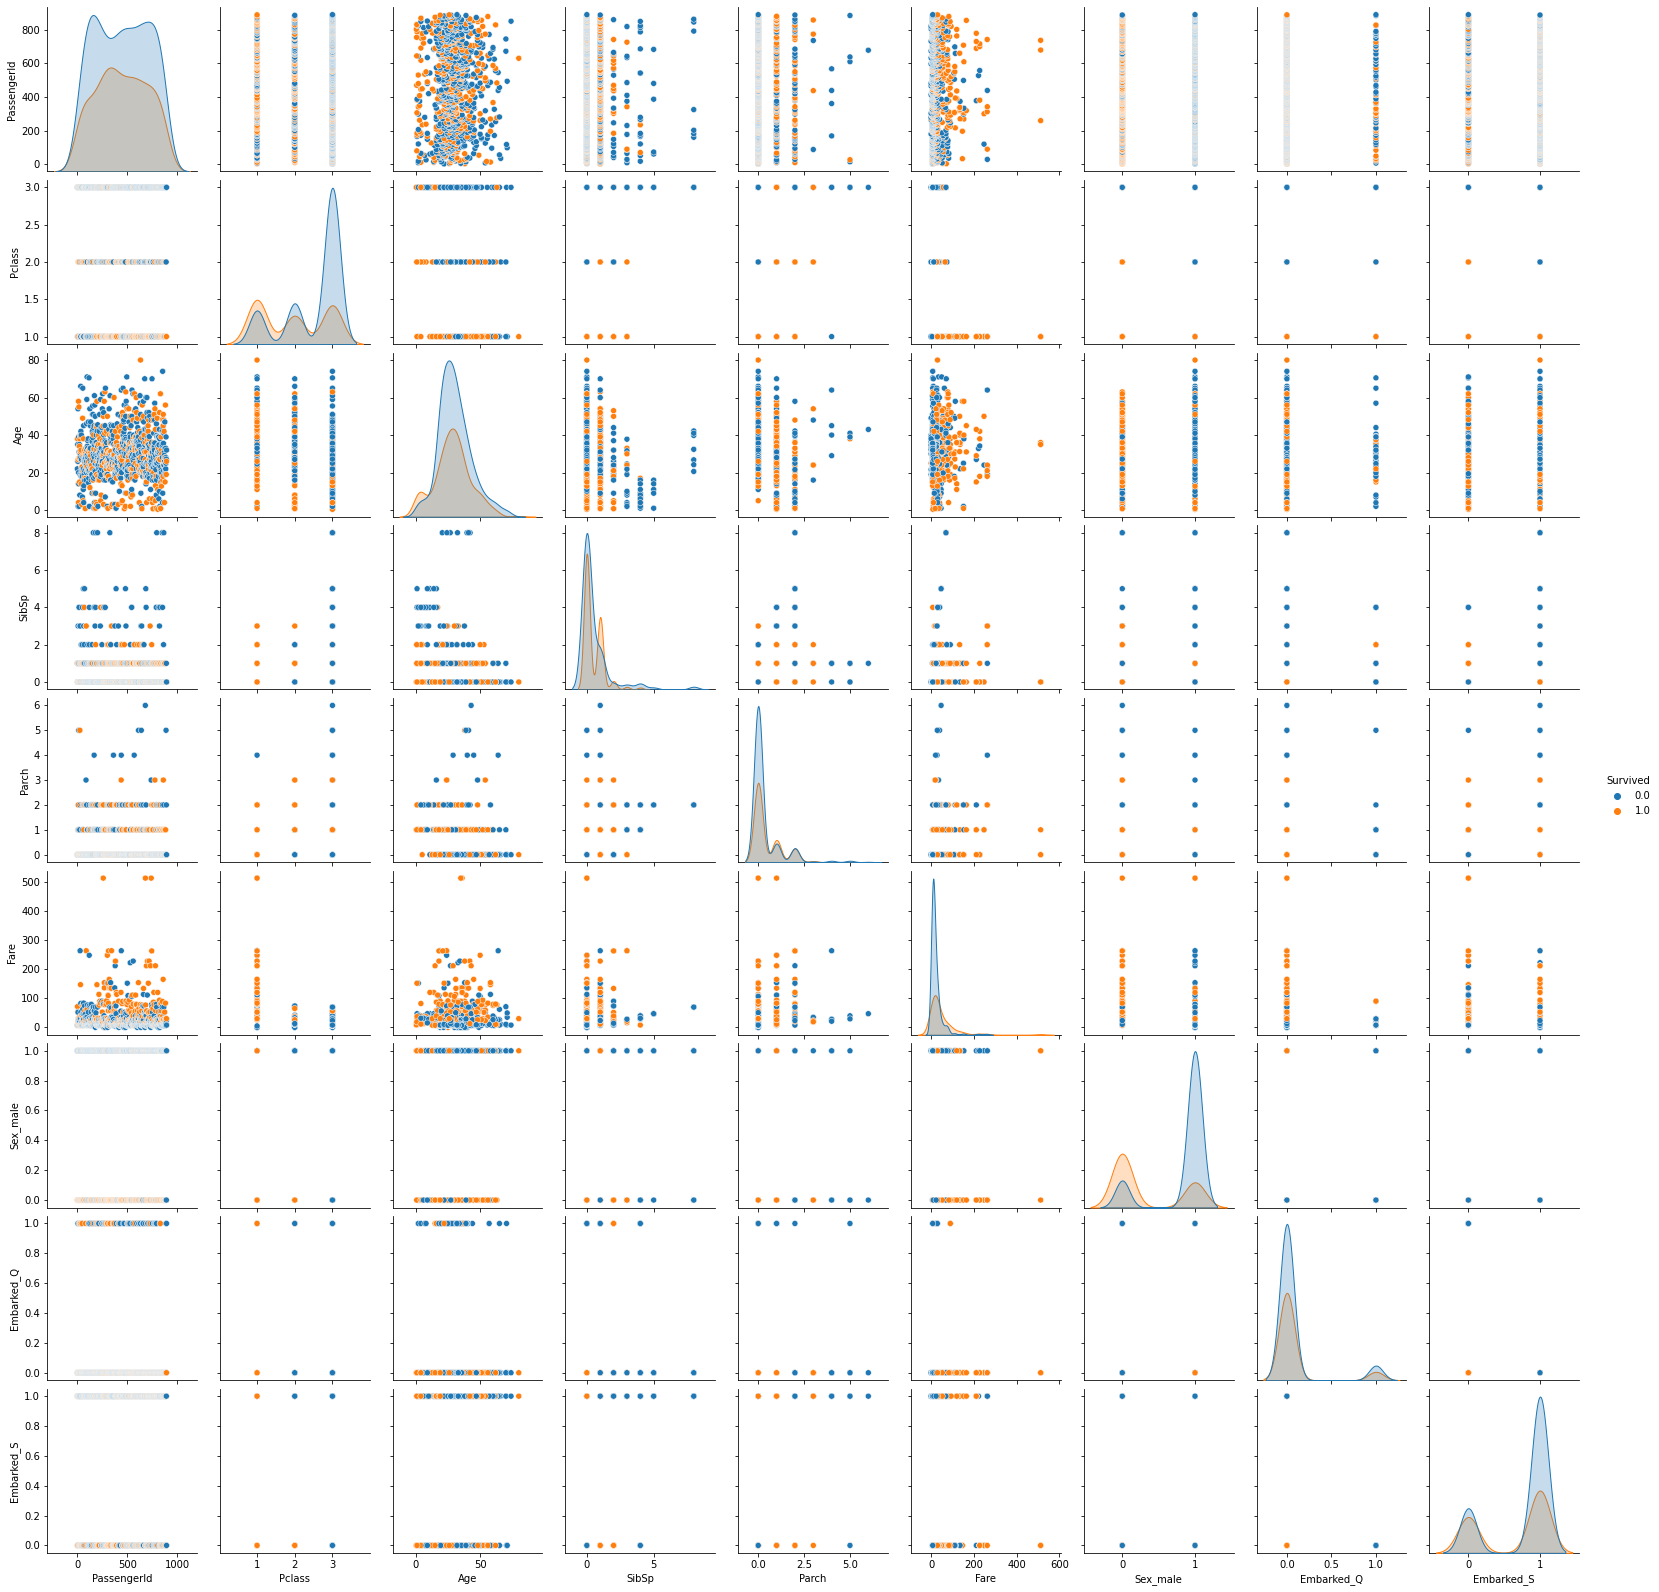

In [38]:
sns.pairplot(df_train,hue='Survived')

In [39]:
corr = df_train.corr()

In [40]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.045045,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.069924,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.332108,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.045045,-0.069924,-0.332108,1.000000,-0.218295,-0.174054,0.099041,0.078046,-0.019648,-0.021451
SibSp,-0.057527,-0.035322,0.083081,-0.218295,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.174054,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.099041,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.078046,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,-0.033606,0.003650,0.221009,-0.019648,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,-0.021451,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


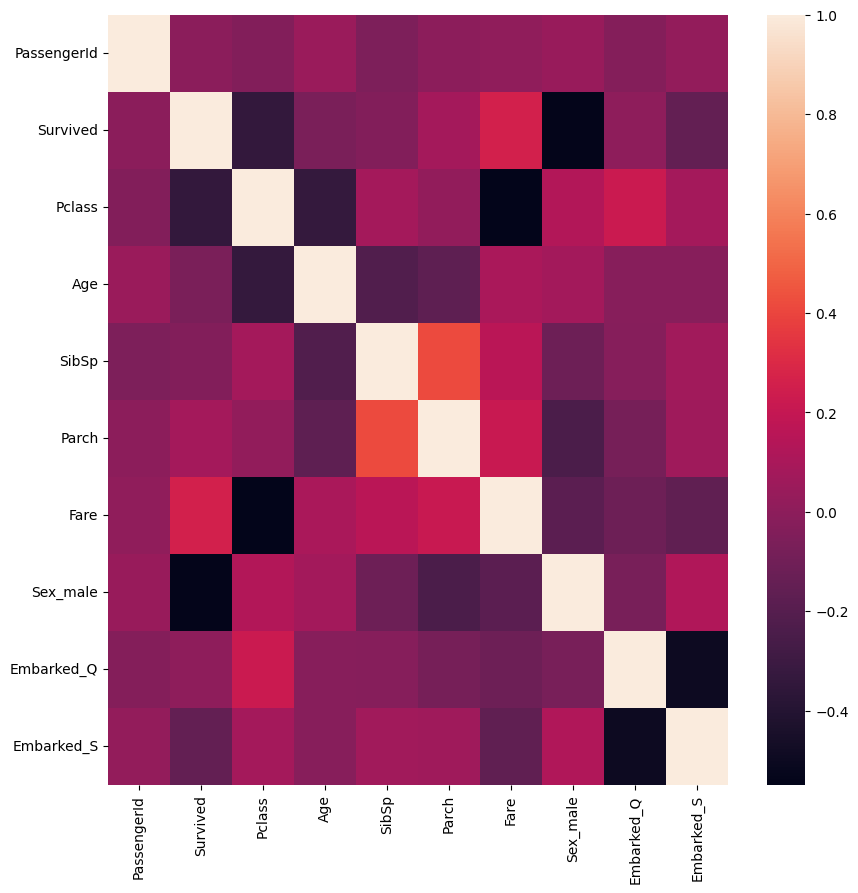

In [41]:
plt.figure(figsize=(10,10))
ax =sns.heatmap(corr)

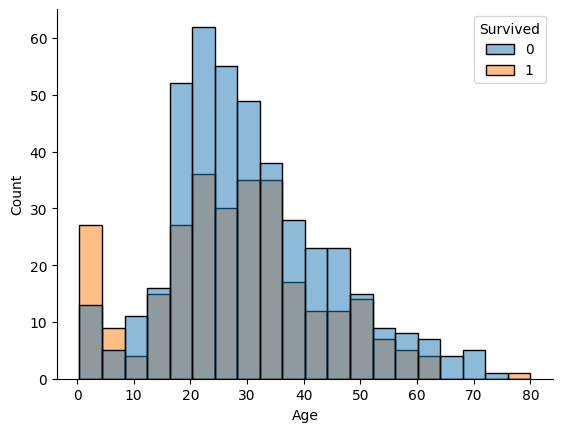

In [42]:


sns.histplot(data =train,x= train["Age"],hue='Survived')
sns.despine()

In [43]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,889.0,0.0,3.0,27.2,1.0,2.0,23.4500,0.0,0.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


In [44]:
X=df_train.iloc[:,2:]
y=df_train.iloc[:,1:2]

In [45]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,3.0,27.2,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


In [46]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [47]:
x_train, x_test,y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
regr=LogisticRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")


Accuracy on CV data: 0.7988826815642458
 Precision on CV data: 0.7714285714285715 
 Recall on CV data: 0.7297297297297297 
 F1 on CV data:0.75 


In [49]:
regr= svm.SVC()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")


Accuracy on CV data: 0.6536312849162011
 Precision on CV data: 0.75 
 Recall on CV data: 0.24324324324324326 
 F1 on CV data:0.3673469387755103 


In [50]:
regr= DecisionTreeClassifier()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")


Accuracy on CV data: 0.7653631284916201
 Precision on CV data: 0.7051282051282052 
 Recall on CV data: 0.7432432432432432 
 F1 on CV data:0.7236842105263159 


In [51]:
regr= RandomForestClassifier()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")


Accuracy on CV data: 0.8156424581005587
 Precision on CV data: 0.7971014492753623 
 Recall on CV data: 0.7432432432432432 
 F1 on CV data:0.7692307692307693 


In [52]:
param_grid = { 
    'n_estimators': range(200,500,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,10,1),
    'criterion' :['gini', 'entropy']
}

In [54]:
CV_rfc = GridSearchCV(estimator=regr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(200, 500, 100)})

In [55]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 200}

In [78]:
rf=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=9, criterion='entropy')

In [79]:
rf.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")


Accuracy on CV data: 0.8156424581005587
 Precision on CV data: 0.7971014492753623 
 Recall on CV data: 0.7432432432432432 
 F1 on CV data:0.7692307692307693 


In [58]:
df_test = df_test.iloc[:,1:]

In [59]:
pred=rf.predict(df_test)

In [60]:
len(pred)

418

In [61]:
gender = gender.iloc[:,1:]

In [62]:

print(f"Accuracy on CV data: {accuracy_score(gender,pred)}\n Precision on CV data: {precision_score(gender,pred)} \n Recall on CV data: {recall_score(gender,pred)} \n F1 on CV data:{f1_score(gender,pred)} ")


Accuracy on CV data: 0.9138755980861244
 Precision on CV data: 0.9328358208955224 
 Recall on CV data: 0.8223684210526315 
 F1 on CV data:0.8741258741258742 


In [63]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,NaN,0,0,8.0500,1,0,1


In [64]:
test_pred=rf.predict(df_test)

In [67]:
len(test_pred)

418

In [69]:
gender

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [70]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(gender,test_pred))

Accuracy for Random Forest on CV data:  0.9138755980861244


In [71]:
test_pred = test_pred.astype("int64")

In [72]:
op=pd.DataFrame(test['PassengerId'])
op['Survived']=test_pred

In [73]:
op.to_csv("test_pred.csv", index=False)